# <b>Assignment : DT</b>

<font color='red'><b> Please check below video before attempting this assignment</b></font>

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('ZhLXULFjIjQ', width="1000",height="500")

<font color='red'><b> TF-IDFW2V</b></font>

<b>Tfidf w2v (w1,w2..) = (tfidf(w1) * w2v(w1) + tfidf(w2) * w2v(w2) + …)  /    (tfidf(w1) + tfidf(w2) + …)</b>

<b>(Optional) Please check course video on [AVgw2V and TF-IDFW2V ](https://www.appliedaicourse.com/lecture/11/applied-machine-learning-online-course/2916/avg-word2vec-tf-idf-weighted-word2vec/3/module-3-foundations-of-natural-language-processing-and-machine-learning)for more details.

<font color='blue'><b>Glove vectors </b></font>

<b>In this assignment you will be working with glove vectors , please check  [this](https://en.wikipedia.org/wiki/GloVe_(machine_learning)) and [this](https://en.wikipedia.org/wiki/GloVe_(machine_learning)) for more details.</b><br>

Download glove vectors from this [link ](https://drive.google.com/file/d/1lDca_ge-GYO0iQ6_XDLWePQFMdAA2b8f/view?usp=sharing)

In [ ]:
import pickle

In [ ]:
#please use below code to load glove vectors
with open('/content/drive/MyDrive/11.Apply Decision Trees on Donors Choose dataset/glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [ ]:
model['midline'].shape

or else , you can use below code

In [ ]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:

Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

# <font color='red'> <b>Task - 1</b></font>

<ol>
    <li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features +  preprocessed_essay (TFIDF) + Sentiment scores(preprocessed_essay)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features +  preprocessed_essay (TFIDF W2V) + Sentiment scores(preprocessed_essay)</li>        </ul>
    </li>
    <li><strong>The hyper paramter tuning (best `depth` in range [1, 5, 10, 50], and the best `min_samples_split` in range [5, 10, 100, 500])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation(use gridsearch cv or randomsearch cv)/simple cross validation data(you can write your own for loops refer sample solution)</li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/Gp2DQmh.jpg' width=500px> with X-axis as <strong>min_sample_split</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/fgN9aUP.jpg' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>min_sample_split</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You choose either of the plotting techniques out of 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
    <li>Once after you plot the confusion matrix with the test data, get all the `false positive data points`
        <ul>
            <li> Plot the WordCloud(https://www.geeksforgeeks.org/generating-word-cloud-python/) with the words of essay text of these `false positive data points`</li>
            <li> Plot the box plot with the `price` of these `false positive data points`</li>
            <li> Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</li>
        </ul>
        </ul>
    </li>
   

# <font color='red'><b> Task - 2 </b></font>

For this task consider **set-1** features.

*  Select all the features which are having non-zero feature importance.You can get the feature importance using  'feature_importances_`
   (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), discard the all other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM).
*  You need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3<br>
  **Note**: when you want to find the feature importance make sure you don't use max_depth parameter keep it None.
  </li>
    <br>
You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

<font color='blue'><b>Hint for calculating Sentiment scores</b></font>

In [ ]:
import nltk
nltk.download('vader_lexicon')

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
ss = sid.polarity_scores(for_sentiment)

for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end='')

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

<h1>1. Decision Tree </h1>

## 1.1 Loading Data

In [ ]:
# https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4
# https://machinelearningmastery.com/develop-word-embeddings-python-gensim/
# https://nlp.stanford.edu/projects/glove/
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import ConfusionMatrixDisplay


from sklearn.preprocessing import Normalizer

import pandas as pd
import numpy as np
import os
import time
import joblib

import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from scipy import sparse

from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = list(stopwords.words('english'))

from wordcloud import WordCloud, STOPWORDS
from tqdm import tqdm

import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.io as pio
pio.renderers.default = "colab"

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/11.Apply Decision Trees on Donors Choose dataset/preprocessed_data.csv')
data.head()

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03
2,ca,mrs,grades_prek_2,10,1,literacy_language,literacy,having class 24 students comes diverse learner...,329.00
3,ga,mrs,grades_prek_2,2,1,appliedlearning,earlydevelopment,i recently read article giving students choice...,481.04
4,wa,mrs,grades_3_5,2,1,literacy_language,literacy,my students crave challenge eat obstacles brea...,17.74


In [ ]:
data.columns

Index(['school_state', 'teacher_prefix', 'project_grade_category',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'price'],
      dtype='object')

In [ ]:
X = data.drop('project_is_approved',axis = 1)
y = data['project_is_approved']

X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size=0.10,random_state = 10)
print("Shape of X_train ",X_train.shape)
print("shape of X_test ",X_test.shape)
print("shape of y_train ",y_train.shape)
print("shape of y_test ",y_test.shape)

Shape of X_train  (98323, 8)
shape of X_test  (10925, 8)
shape of y_train  (98323,)
shape of y_test  (10925,)


In [ ]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109248 entries, 0 to 109247
Data columns (total 9 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   school_state                                  109248 non-null  object 
 1   teacher_prefix                                109248 non-null  object 
 2   project_grade_category                        109248 non-null  object 
 3   teacher_number_of_previously_posted_projects  109248 non-null  int64  
 4   project_is_approved                           109248 non-null  int64  
 5   clean_categories                              109248 non-null  object 
 6   clean_subcategories                           109248 non-null  object 
 7   essay                                         109248 non-null  object 
 8   price                                         109248 non-null  float64
dtypes: float64(1), int64(2), object(6)
memory usage: 

In [ ]:
feature_list = []

In [ ]:
if  not os.path.exists('/content/drive/MyDrive/11.Apply Decision Trees on Donors Choose dataset/train_data_sparse.npz') and not os.path.exists('/content/drive/MyDrive/11.Apply Decision Trees on Donors Choose dataset/test_data_sparse.npz')  :

  #school state
  count_vect = CountVectorizer()
  count_vect.fit(X_train['school_state'])
  ss_count_vect_train = count_vect.transform(X_train['school_state'])
  ss_count_vect_test = count_vect.transform(X_test['school_state'])
  feature_list.extend(count_vect.get_feature_names_out())
  print(len(feature_list))

  #teacher prefix
  count_vect = CountVectorizer()
  count_vect.fit(X_train['teacher_prefix'])
  tp_count_vect_train = count_vect.transform(X_train['teacher_prefix'])
  tp_count_vect_test = count_vect.transform(X_test['teacher_prefix'])
  feature_list.extend(count_vect.get_feature_names_out())
  print(len(feature_list))

  #project grade category
  count_vect = CountVectorizer()
  count_vect.fit(X_train['project_grade_category'])
  pgc_count_vect_train = count_vect.transform(X_train['project_grade_category'])
  pgc_count_vect_test = count_vect.transform(X_test['project_grade_category'])
  feature_list.extend(count_vect.get_feature_names_out())
  print(len(feature_list))

  #clean categories
  count_vect = CountVectorizer()
  count_vect.fit(X_train['clean_categories'])
  cc_count_vect_train = count_vect.transform(X_train['clean_categories'])
  cc_count_vect_test = count_vect.transform(X_test['clean_categories'])
  feature_list.extend(count_vect.get_feature_names_out())
  print(len(feature_list))

  #clean_subcategories
  count_vect = CountVectorizer()
  count_vect.fit(X_train['clean_subcategories'])
  scg_count_vect_train = count_vect.transform(X_train['clean_subcategories'])
  scg_count_vect_test = count_vect.transform(X_test['clean_subcategories'])
  feature_list.extend(count_vect.get_feature_names_out())
  print(len(feature_list))

  #teacher_number_of_previously_posted_projects
  normaliser = Normalizer()
  normaliser.fit(np.array(X_train['teacher_number_of_previously_posted_projects']).reshape(1,-1))
  norm_teacher_prev_projects_train = normaliser.transform(np.array(X_train['teacher_number_of_previously_posted_projects']).reshape(1,-1))
  norm_teacher_prev_projects_train = norm_teacher_prev_projects_train.reshape(X_train['teacher_number_of_previously_posted_projects'].shape[0],-1)

  normaliser.fit(np.array(X_test['teacher_number_of_previously_posted_projects']).reshape(1,-1))
  norm_teacher_prev_projects_test = normaliser.transform(np.array(X_test['teacher_number_of_previously_posted_projects']).reshape(1,-1))
  norm_teacher_prev_projects_test = norm_teacher_prev_projects_test.reshape(X_test['teacher_number_of_previously_posted_projects'].shape[0],-1)
  feature_list.append('teacher_number_of_previously_posted_projects')
  print(len(feature_list))

  #price
  normaliser = Normalizer()
  norm_price_train = normaliser.fit_transform(X_train['price'].values.reshape(1,-1))
  norm_price_test = normaliser.fit_transform(X_test['price'].values.reshape(1,-1))
  norm_price_train = norm_price_train.reshape(norm_price_train.shape[1],-1)
  norm_price_test = norm_price_test.reshape(norm_price_test.shape[1],-1)
  feature_list.append('price')
  print(len(feature_list))

  #essay
  tfidf_vect = TfidfVectorizer(lowercase = True,
                              ngram_range = (1,4),
                              min_df = 4,
                              max_features = 5000)
  tfidf_vect.fit(X_train['essay'])
  tfidf_essay_train = tfidf_vect.transform(X_train['essay'])
  tfidf_essay_test = tfidf_vect.transform(X_test['essay'])
  feature_list.extend(tfidf_vect.get_feature_names_out())
  print(len(feature_list))

  #essay sentiment data
  sid = SentimentIntensityAnalyzer()

  sid_list_train = []
  for essay_data in X_train['essay'].values:
    for_sentiment = essay_data
    ss = sid.polarity_scores(for_sentiment)
    sid_list_train.append(list(ss.values()))


  sid_list_test = []
  for essay_data in X_test['essay'].values:
    for_sentiment = essay_data
    ss = sid.polarity_scores(for_sentiment)
    sid_list_test.append(list(ss.values()))

  feature_list.extend(['neg','neu','pos','compound'])
  print(len(feature_list))

  #stack all the features into a single matrix
  train_data_sparse = sparse.hstack((ss_count_vect_train,tp_count_vect_train,pgc_count_vect_train,cc_count_vect_train,scg_count_vect_train,norm_teacher_prev_projects_train,norm_price_train,tfidf_essay_train,sid_list_train))

  test_data_sparse = sparse.hstack((ss_count_vect_test,tp_count_vect_test,pgc_count_vect_test,cc_count_vect_test,scg_count_vect_test,norm_teacher_prev_projects_test,norm_price_test,tfidf_essay_test,sid_list_test))

  #store the matrix in a file

  sparse.save_npz("/content/drive/MyDrive/11.Apply Decision Trees on Donors Choose dataset/train_data_sparse.npz", train_data_sparse)
  sparse.save_npz("/content/drive/MyDrive/11.Apply Decision Trees on Donors Choose dataset/test_data_sparse.npz", test_data_sparse)

else:
  train_data_sparse  = sparse.load_npz("/content/drive/MyDrive/11.Apply Decision Trees on Donors Choose dataset/train_data_sparse.npz")
  test_data_sparse  = sparse.load_npz("/content/drive/MyDrive/11.Apply Decision Trees on Donors Choose dataset/test_data_sparse.npz")



In [ ]:
# [1, 5, 10, 50], and the best `min_samples_split` in range [5, 10, 100, 500]
start_time = time.time()
parameters = {'max_depth':[1, 5, 10, 50],'min_samples_split':[5, 10, 100, 500]}
dtclf = DecisionTreeClassifier()
gd_clf1 = GridSearchCV(dtclf,
                       parameters,
                       scoring = 'roc_auc',
                       cv = 3,
                       return_train_score = True)
gd_clf1.fit(train_data_sparse,y_train)
end_time = time.time()

print("The total time taken  to run grid search is ",end_time-start_time)

In [ ]:
import joblib

joblib.dump(gd_clf1, '/content/drive/MyDrive/11.Apply Decision Trees on Donors Choose dataset/GS_obj.pkl')

In [ ]:
gd = joblib.load("/content/drive/MyDrive/11.Apply Decision Trees on Donors Choose dataset/GS_obj.pkl")

In [ ]:
start_time = time.time()
parameters = {'max_depth':[1, 5, 10, 50],'min_samples_split':[5, 10, 100, 500]}
dtclf = DecisionTreeClassifier()
rs_clf1 = RandomizedSearchCV(dtclf,
                       parameters,
                       scoring = 'roc_auc',
                       cv = 3,
                       return_train_score = True)
rs_clf1.fit(train_data_sparse,y_train)
end_time = time.time()

print("The total time taken  to run random search is ",end_time-start_time)

In [ ]:
joblib.dump(rs_clf1, '/content/drive/MyDrive/11.Apply Decision Trees on Donors Choose dataset/RS_obj.pkl')

In [ ]:
gd.best_estimator_

In [ ]:
params_df = pd.DataFrame(gd.cv_results_['params'])
auc_df  = pd.DataFrame(gd.cv_results_).loc[:,['mean_test_score','mean_train_score']]

param_auc  = pd.merge(params_df,auc_df,left_index=True,right_index=True)

train_x = param_auc['min_samples_split']
train_y = param_auc['max_depth']
train_z = param_auc['mean_train_score']


test_x = param_auc['min_samples_split']
test_y = param_auc['max_depth']
test_z = param_auc['mean_test_score']

In [ ]:
trace1 = go.Scatter3d(x=train_x,y=train_y,z=train_z, name = 'train')
trace2 = go.Scatter3d(x=test_x,y=test_y,z=test_z, name = 'Cross validation')
data = [trace1, trace2]

layout = go.Layout(scene = dict(
        xaxis = dict(title='n_estimators'),
        yaxis = dict(title='max_depth'),
        zaxis = dict(title='AUC'),))

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='3d-scatter-colorscale')


In [ ]:
sns.heatmap(np.array(auc_df['mean_train_score']).reshape(4,4),
            annot = True,
            xticklabels = [5,10,100,500],
            yticklabels = [1,5,10,50])

In [ ]:
sns.heatmap(np.array(auc_df['mean_test_score']).reshape(4,4),
            annot = True,
            xticklabels = [5,10,100,500],
            yticklabels = [1,5,10,50])

In [ ]:
gd.best_estimator_

In [ ]:
dt_clf_task1 = DecisionTreeClassifier(max_depth = 10,min_samples_split = 500,random_state = 5)
dt_clf_task1.fit(train_data_sparse,y_train)
y_train_pred_proba = dt_clf_task1.predict_proba(train_data_sparse)[:,1]
y_test_pred_proba = dt_clf_task1.predict_proba(test_data_sparse)[:,1]
y_train_pred_value = dt_clf_task1.predict(train_data_sparse)
y_test_pred_value = dt_clf_task1.predict(test_data_sparse)

train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_pred_proba)
train_auc = auc(train_fpr, train_tpr)

test_fpr, test_tpr, thresholds = roc_curve(y_test, y_test_pred_proba)
test_auc = auc(test_fpr, test_tpr)

In [ ]:
plt.plot(train_fpr,train_tpr,label = "train_auc "+str(round(train_auc,5)))
plt.plot(test_fpr,test_tpr,label = "test_auc "+str(round(test_auc,5)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [ ]:
test_actual_pred = pd.DataFrame({'actual':np.array(y_test),'pred':y_test_pred_value})
true_neg_count = test_actual_pred[(test_actual_pred['actual'] == 0) & (test_actual_pred['pred'] == 0)].shape[0]
true_pos_count = test_actual_pred[(test_actual_pred['actual'] == 1) & (test_actual_pred['pred'] == 1)].shape[0]
false_pos_count = test_actual_pred[(test_actual_pred['actual'] == 0) & (test_actual_pred['pred'] == 1)].shape[0]
false_neg_count = test_actual_pred[(test_actual_pred['actual'] == 1) & (test_actual_pred['pred'] == 0)].shape[0]

In [ ]:
cm = np.array([
    [true_neg_count,false_pos_count],
    [false_neg_count,true_pos_count]
    ])


disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

In [ ]:
essay_df = pd.DataFrame(X_test['essay'])
y_test_df = pd.DataFrame(y_test)
essay_test_actual = pd.merge(essay_df,y_test_df,left_index = True,right_index = True)

y_test_pred_df = pd.DataFrame({'pred_value':y_test_pred_value})
essay_test_actual['index'] = list(range(essay_test_actual.shape[0]))
essay_actual_pred_df = pd.merge(essay_test_actual,y_test_pred_df,left_on = 'index',right_index=True)
essay_actual_pred_df.drop('index',axis = 1,inplace = True)
false_pos_df = essay_actual_pred_df[(essay_actual_pred_df['project_is_approved'] == 0) & (essay_actual_pred_df['pred_value'] == 1)]



stopwords = set(STOPWORDS)
final_essay_data = ''
for str_data in false_pos_df['essay'].values:
  str_data = str(str_data)
  str_data = str_data.lower()
  final_essay_data = final_essay_data + str_data

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(final_essay_data)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()



In [ ]:
#Set 2 features

In [ ]:
#please use below code to load glove vectors
import pickle
with open('/content/drive/MyDrive/11.Apply Decision Trees on Donors Choose dataset/glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())


In [ ]:
W2V_dim = list(model.values())[0].shape[0]

In [ ]:
W2V_dim


300

In [ ]:
tfidf = TfidfVectorizer(max_features=5000)
tfidf.fit(X_train['essay'])
X_train_essay = tfidf.transform(X_train['essay'])
X_test_essay = tfidf.transform(X_test['essay'])



In [ ]:
X_train['essay'].values[0].split(' ')

['my',
 'students',
 'entertaining',
 'bright',
 'eager',
 'learn',
 'they',
 'always',
 'eager',
 'participate',
 'help',
 'one',
 'another',
 'needed',
 'each',
 'child',
 'brings',
 'something',
 'special',
 'classroom',
 'whether',
 'compassion',
 'peers',
 'willingness',
 'help',
 'friend',
 'my',
 'students',
 'kind',
 'one',
 'another',
 'try',
 'best',
 'work',
 'team',
 'we',
 'working',
 'towards',
 'building',
 'family',
 'like',
 'environment',
 'i',
 'see',
 'one',
 'it',
 'goal',
 'make',
 'sure',
 'everything',
 'need',
 'academically',
 'successful',
 'truly',
 'understand',
 'power',
 'education',
 'these',
 'materials',
 'allow',
 'guide',
 'students',
 'thinking',
 'process',
 'by',
 'writing',
 'easel',
 'easel',
 'paper',
 'work',
 'together',
 'come',
 'ideas',
 'make',
 'sure',
 'understanding',
 'clear',
 'solid',
 'these',
 'materials',
 'also',
 'allow',
 'model',
 'students',
 'certain',
 'tasks',
 'done',
 'give',
 'visuals',
 'foster',
 'connections',
 'the

In [ ]:
X_train_essay[0].toarray()[0][3003]*model['my']


array([ 1.75005677e-02, -2.24877424e-02, -2.15632732e-02, -3.88536806e-03,
       -1.23179911e-02, -1.18132521e-02, -2.53107384e-01,  1.64609826e-02,
        3.67013085e-03, -3.62809879e-02,  1.16113566e-02, -5.78590196e-03,
        4.03472355e-02, -5.65732636e-03,  1.07984612e-02, -4.11465531e-03,
        1.39307943e-02, -2.35414956e-04,  1.44927960e-02,  1.52785357e-03,
        5.10276292e-02, -4.22628821e-02,  3.43429085e-02,  1.22152723e-02,
       -9.28011211e-03, -1.04554749e-02,  8.71870075e-03, -4.94307651e-03,
        6.72512959e-03,  1.36503837e-02,  1.90407593e-03, -1.39975024e-02,
        2.09841517e-02,  1.65489429e-02, -2.65179794e-02,  1.84775769e-02,
       -3.25872436e-02, -1.07671733e-02,  1.09578525e-02,  1.10558486e-02,
        2.33638039e-03,  1.30317096e-02, -1.49662470e-02, -7.98313970e-03,
       -6.40457610e-03, -6.86917205e-04, -2.71165821e-03, -1.52501995e-02,
       -2.20255078e-02,  6.94178361e-03, -2.10349208e-03, -2.67163329e-02,
        1.98253184e-02,  

In [ ]:
X_train_essay[0].toarray()[0][3003]

In [ ]:
tfidf.vocabulary_['my']

In [ ]:
model['my']

In [ ]:
m

In [ ]:
word_index_dict = tfidf.vocabulary_
X_train_tfidf_w2v = np.zeros(W2V_dim).reshape(1,W2V_dim)

for essay_index in range(len(X_train['essay'].values)):
  essay_str = X_train['essay'].values[essay_index]
  essay_str_list = essay_str.split(" ")

  final_vect = np.zeros(W2V_dim).reshape(1,W2V_dim)
  total_tfidf = 0

  for essay_word in essay_str_list:


    if essay_word in model.keys() and essay_word in tfidf.vocabulary_.keys():

      essay_word_w2v = model[essay_word]
      essay_word_tfidf = X_train_essay[essay_index].toarray()[0][word_index_dict[essay_word]]
      # print("the tfidf value is ",essay_word_tfidf)
      # print("the w2v value is ",essay_word_w2v)
      tfidf_w2v = essay_word_tfidf * essay_word_w2v #w2v * tfidf
      # print("TFIDF w2V..")
      # print(tfidf_w2v)
      tfidf_w2v = tfidf_w2v.reshape(1,W2V_dim)
      # print("the shape is ",tfidf_w2v.shape)
      # print(tfidf_w2v)
      # print("final vect before addition")
      # print(final_vect)
      final_vect  = final_vect + tfidf_w2v
      # print("the final vec ts is")
      # print(final_vect)
      total_tfidf += essay_word_tfidf
    else:
      continue


  try:
    final_vect = final_vect/total_tfidf
    X_train_tfidf_w2v = np.concatenate((X_train_tfidf_w2v,final_vect),axis = 0)
    # print("the final vector is ")
    # print(X_train_tfidf_w2v)
    # print("shape of final array is ",X_train_tfidf_w2v.shape)

  except Exception as ze:
    print(ze)
    print("Exception word is ",essay_word)




  # print("Shape of the final_vect ",len(X_train_tfidf_w2v),X_train_tfidf_w2v[-1].shape)


In [ ]:
feature_list = []

In [ ]:
import threading
class TFIDF_W2V(threading.Thread):
  def __init__(self,start,end,tfidf_w2v_vec,**kwargs):
    super(TFIDF_W2V,self).__init__(**kwargs)
    self.start_index = start
    self.end_index = end
    self.tfidf_w2v_vec = tfidf_w2v_vec
    self.daemon = True
    self.start()

  def tfidf_computation(self):
    print("running for range ",self.start_index,self.end_index)
    for essay_index in np.arange(self.start_index,self.end_index):

      essay_str = X_train['essay'].values[essay_index]
      essay_str_list = essay_str.split(" ")

      final_vect = np.zeros(W2V_dim).reshape(1,W2V_dim)
      total_tfidf = 0

      for essay_word in essay_str_list:
        if essay_word in model.keys() and essay_word in tfidf.vocabulary_.keys():
          essay_word_w2v = model[essay_word]
          essay_word_tfidf = X_train_essay[essay_index].toarray()[0][word_index_dict[essay_word]]
          # print("the tfidf value is ",essay_word_tfidf)
          # print("the w2v value is ",essay_word_w2v)
          tfidf_w2v = essay_word_tfidf * essay_word_w2v #w2v * tfidf
          # print("TFIDF w2V..")
          # print(tfidf_w2v)
          tfidf_w2v = tfidf_w2v.reshape(1,W2V_dim)

          final_vect  = final_vect + tfidf_w2v
          # print("the final vec ts is")
          # print(final_vect)
          total_tfidf += essay_word_tfidf
        else:
          continue


      try:
        final_vect = final_vect/total_tfidf
        self.tfidf_w2v_vec = np.concatenate((self.tfidf_w2v_vec,final_vect),axis = 0)


      except Exception as ze:
        print(ze)
        print("Exception word is ",essay_word)



  def run(self):
    self.tfidf_computation()


In [ ]:
word_index_dict = tfidf.vocabulary_
X_train_tfidf_w2v = np.zeros(W2V_dim).reshape(1,W2V_dim)
current_workers = []
start_index = 0
step = 20000
for thread_id in range(1,6):
  print("the thread id is ",thread_id)
  start_point = start_index
  end_point = start_point+step

  if end_point > X_train.shape[0]:
    end_point = X_train.shape[0]
  X_train_tfidf_w2v = np.zeros(W2V_dim).reshape(1,W2V_dim)
  tfidf_w2v = TFIDF_W2V(start_point,end_point,X_train_tfidf_w2v)
  current_workers.append(tfidf_w2v)
  start_index = end_point

for worker in current_workers:
  worker.join()

dummy_array = np.zeros(W2V_dim).reshape(1,W2V_dim)
for i in range(len(current_workers)):
  dummy_array = np.concatenate((dummy_array,current_workers[i].tfidf_w2v_vec[1:,:]),axis = 0)

X_train_tfidf_w2v = dummy_array[1:,:]
print("the shape of the final array is ",X_train_tfidf_w2v.shape)




the thread id is  1
running for range the thread id is  2
 0 20000
running for range  20000the thread id is  3
 40000
running for range  40000 60000
the thread id is  4
running for range  60000the thread id is  80000
 5
running for range  80000 98323


In [ ]:
X_train_tfidf_w2v.shape

(98323, 300)

In [ ]:
print("*************************************************************************************")

*************************************************************************************


In [ ]:
word_index_dict = tfidf.vocabulary_
X_test_tfidf_w2v = np.zeros(W2V_dim).reshape(1,W2V_dim)
current_workers = []
start_index = 0
step = 2000
for thread_id in range(1,6):
  print("the thread id is ",thread_id)
  start_point = start_index
  end_point = start_point+step

  if thread_id == 5:
    end_point = X_test.shape[0]
  X_test_tfidf_w2v = np.zeros(W2V_dim).reshape(1,W2V_dim)
  tfidf_w2v = TFIDF_W2V(start_point,end_point,X_test_tfidf_w2v)
  current_workers.append(tfidf_w2v)
  start_index = end_point

for worker in current_workers:
  worker.join()

dummy_array = np.zeros(W2V_dim).reshape(1,W2V_dim)
for i in range(len(current_workers)):
  dummy_array = np.concatenate((dummy_array,current_workers[i].tfidf_w2v_vec[1:,:]),axis = 0)

X_test_tfidf_w2v = dummy_array[1:,:]
print("the shape of the final array is ",X_test_tfidf_w2v.shape)




the thread id is  1
running for range the thread id is  2
 0 2000running for range  2000 4000
the thread id is 
 3
running for range  4000 6000the thread id is 
 4
running for range  the thread id is  5
6000 8000
running for range  8000 10925
the shape of the final array is  (10925, 300)


In [ ]:
feature_list

[]

In [ ]:
X_test.shape

(10925, 8)

In [ ]:
feature_list.extend(list(range(W2V_dim)))

In [ ]:
if  not os.path.exists('/content/drive/MyDrive/11.Apply Decision Trees on Donors Choose dataset/tfidf_train_data_sparse.npz') \
 and not os.path.exists('/content/drive/MyDrive/11.Apply Decision Trees on Donors Choose dataset/tfidf_test_data_sparse.npz')  :

  #school state
  count_vect = CountVectorizer()
  count_vect.fit(X_train['school_state'])
  ss_count_vect_train = count_vect.transform(X_train['school_state'])
  ss_count_vect_test = count_vect.transform(X_test['school_state'])
  feature_list.extend(count_vect.get_feature_names_out())
  print(len(feature_list))

  #teacher prefix
  count_vect = CountVectorizer()
  count_vect.fit(X_train['teacher_prefix'])
  tp_count_vect_train = count_vect.transform(X_train['teacher_prefix'])
  tp_count_vect_test = count_vect.transform(X_test['teacher_prefix'])
  feature_list.extend(count_vect.get_feature_names_out())
  print(len(feature_list))

  #project grade category
  count_vect = CountVectorizer()
  count_vect.fit(X_train['project_grade_category'])
  pgc_count_vect_train = count_vect.transform(X_train['project_grade_category'])
  pgc_count_vect_test = count_vect.transform(X_test['project_grade_category'])
  feature_list.extend(count_vect.get_feature_names_out())
  print(len(feature_list))

  #clean categories
  count_vect = CountVectorizer()
  count_vect.fit(X_train['clean_categories'])
  cc_count_vect_train = count_vect.transform(X_train['clean_categories'])
  cc_count_vect_test = count_vect.transform(X_test['clean_categories'])
  feature_list.extend(count_vect.get_feature_names_out())
  print(len(feature_list))

  #clean_subcategories
  count_vect = CountVectorizer()
  count_vect.fit(X_train['clean_subcategories'])
  scg_count_vect_train = count_vect.transform(X_train['clean_subcategories'])
  scg_count_vect_test = count_vect.transform(X_test['clean_subcategories'])
  feature_list.extend(count_vect.get_feature_names_out())
  print(len(feature_list))

  #teacher_number_of_previously_posted_projects
  normaliser = Normalizer()
  normaliser.fit(np.array(X_train['teacher_number_of_previously_posted_projects']).reshape(1,-1))
  norm_teacher_prev_projects_train = normaliser.transform(np.array(X_train['teacher_number_of_previously_posted_projects']).reshape(1,-1))
  norm_teacher_prev_projects_train = norm_teacher_prev_projects_train.reshape(X_train['teacher_number_of_previously_posted_projects'].shape[0],-1)

  normaliser.fit(np.array(X_test['teacher_number_of_previously_posted_projects']).reshape(1,-1))
  norm_teacher_prev_projects_test = normaliser.transform(np.array(X_test['teacher_number_of_previously_posted_projects']).reshape(1,-1))
  norm_teacher_prev_projects_test = norm_teacher_prev_projects_test.reshape(X_test['teacher_number_of_previously_posted_projects'].shape[0],-1)
  feature_list.append('teacher_number_of_previously_posted_projects')
  print(len(feature_list))

  #price
  normaliser = Normalizer()
  norm_price_train = normaliser.fit_transform(X_train['price'].values.reshape(1,-1))
  norm_price_test = normaliser.fit_transform(X_test['price'].values.reshape(1,-1))
  norm_price_train = norm_price_train.reshape(norm_price_train.shape[1],-1)
  norm_price_test = norm_price_test.reshape(norm_price_test.shape[1],-1)
  feature_list.append('price')
  print(len(feature_list))

  #essay sentiment data
  sid = SentimentIntensityAnalyzer()

  sid_list_train = []
  for essay_data in X_train['essay'].values:
    for_sentiment = essay_data
    ss = sid.polarity_scores(for_sentiment)
    sid_list_train.append(list(ss.values()))


  sid_list_test = []
  for essay_data in X_test['essay'].values:
    for_sentiment = essay_data
    ss = sid.polarity_scores(for_sentiment)
    sid_list_test.append(list(ss.values()))

  feature_list.extend(['neg','neu','pos','compound'])
  print(len(feature_list))

  #stack all the features into a single matrix
  tfidf_train_data_sparse = sparse.hstack((ss_count_vect_train,tp_count_vect_train,pgc_count_vect_train,cc_count_vect_train,scg_count_vect_train,norm_teacher_prev_projects_train,norm_price_train,X_train_tfidf_w2v,sid_list_train))

  tfidf_test_data_sparse = sparse.hstack((ss_count_vect_test,tp_count_vect_test,pgc_count_vect_test,cc_count_vect_test,scg_count_vect_test,norm_teacher_prev_projects_test,norm_price_test,X_test_tfidf_w2v,sid_list_test))


  #store the matrix in a file

  sparse.save_npz("/content/drive/MyDrive/11.Apply Decision Trees on Donors Choose dataset/tfidf_train_data_sparse.npz", tfidf_train_data_sparse)
  sparse.save_npz("/content/drive/MyDrive/11.Apply Decision Trees on Donors Choose dataset/tfidf_test_data_sparse.npz", tfidf_test_data_sparse)

else:
  tfidf_train_data_sparse  = sparse.load_npz("/content/drive/MyDrive/11.Apply Decision Trees on Donors Choose dataset/tfidf_train_data_sparse.npz")
  tfidf_test_data_sparse  = sparse.load_npz("/content/drive/MyDrive/11.Apply Decision Trees on Donors Choose dataset/tfidf_test_data_sparse.npz")


351
356
360
369
399
400
401
405


In [ ]:
# [1, 5, 10, 50], and the best `min_samples_split` in range [5, 10, 100, 500]
start_time = time.time()
parameters = {'max_depth':[1, 5, 10, 50],'min_samples_split':[5, 10, 100, 500]}
dtclf = DecisionTreeClassifier()
gd_clf2 = GridSearchCV(dtclf,
                       parameters,
                       scoring = 'roc_auc',
                       cv = 3,
                       return_train_score = True)
gd_clf2.fit(tfidf_train_data_sparse,y_train)
end_time = time.time()

print("The total time taken  to run grid search is ",end_time-start_time)

The total time taken  to run grid search is  3578.8855311870575


In [ ]:
import joblib

joblib.dump(gd_clf2, '/content/drive/MyDrive/11.Apply Decision Trees on Donors Choose dataset/TFIDF_GS_obj.pkl')

['/content/drive/MyDrive/11.Apply Decision Trees on Donors Choose dataset/TFIDF_GS_obj.pkl']

In [ ]:
gd_clf2 = joblib.load("/content/drive/MyDrive/11.Apply Decision Trees on Donors Choose dataset/TFIDF_GS_obj.pkl")

In [ ]:
gd_clf2.best_estimator_

DecisionTreeClassifier(max_depth=5, min_samples_split=10)

In [ ]:
start_time = time.time()
parameters = {'max_depth':[1, 5, 10, 50],'min_samples_split':[5, 10, 100, 500]}
dtclf = DecisionTreeClassifier()
rs_clf2 = RandomizedSearchCV(dtclf,
                       parameters,
                       scoring = 'roc_auc',
                       cv = 3,
                       return_train_score = True)
rs_clf2.fit(tfidf_train_data_sparse,y_train)
end_time = time.time()

print("The total time taken  to run random search is ",end_time-start_time)

In [ ]:
joblib.dump(rs_clf2, '/content/drive/MyDrive/11.Apply Decision Trees on Donors Choose dataset/TFIDF_RS_obj.pkl')

In [ ]:
params_df = pd.DataFrame(gd_clf2.cv_results_['params'])
auc_df  = pd.DataFrame(gd_clf2.cv_results_).loc[:,['mean_test_score','mean_train_score']]

param_auc  = pd.merge(params_df,auc_df,left_index=True,right_index=True)

train_x = param_auc['min_samples_split']
train_y = param_auc['max_depth']
train_z = param_auc['mean_train_score']


test_x = param_auc['min_samples_split']
test_y = param_auc['max_depth']
test_z = param_auc['mean_test_score']

In [ ]:
trace1 = go.Scatter3d(x=train_x,y=train_y,z=train_z, name = 'train')
trace2 = go.Scatter3d(x=test_x,y=test_y,z=test_z, name = 'Cross validation')
data = [trace1, trace2]

layout = go.Layout(scene = dict(
        xaxis = dict(title='n_estimators'),
        yaxis = dict(title='max_depth'),
        zaxis = dict(title='AUC'),))

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='3d-scatter-colorscale')


<Axes: >

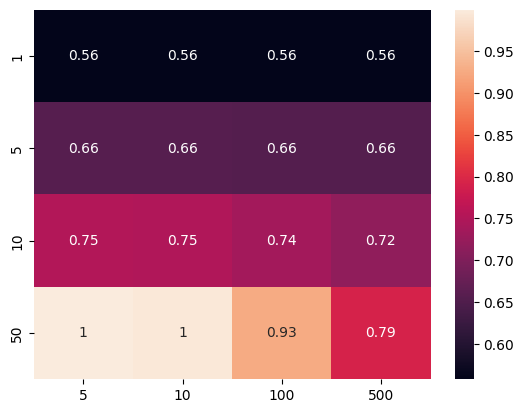

In [ ]:
sns.heatmap(np.array(auc_df['mean_train_score']).reshape(4,4),
            annot = True,
            xticklabels = [5,10,100,500],
            yticklabels = [1,5,10,50])

<Axes: >

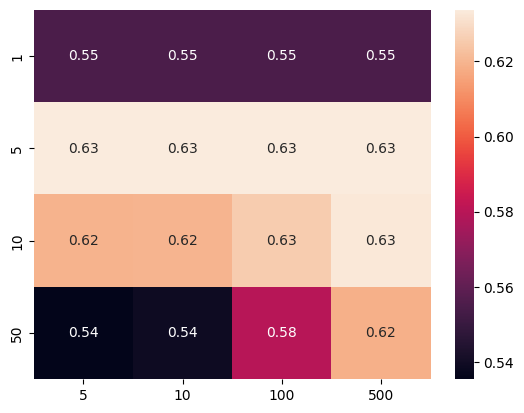

In [ ]:
sns.heatmap(np.array(auc_df['mean_test_score']).reshape(4,4),
            annot = True,
            xticklabels = [5,10,100,500],
            yticklabels = [1,5,10,50])

In [ ]:
dt_clf_task1 = DecisionTreeClassifier(max_depth = 5,min_samples_split = 10,random_state = 5)
dt_clf_task1.fit(tfidf_train_data_sparse,y_train)
y_train_pred_proba = dt_clf_task1.predict_proba(tfidf_train_data_sparse)[:,1]
y_test_pred_proba = dt_clf_task1.predict_proba(tfidf_test_data_sparse)[:,1]
y_train_pred_value = dt_clf_task1.predict(tfidf_train_data_sparse)
y_test_pred_value = dt_clf_task1.predict(tfidf_test_data_sparse)

train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_pred_proba)
train_auc = auc(train_fpr, train_tpr)

test_fpr, test_tpr, thresholds = roc_curve(y_test, y_test_pred_proba)
test_auc = auc(test_fpr, test_tpr)

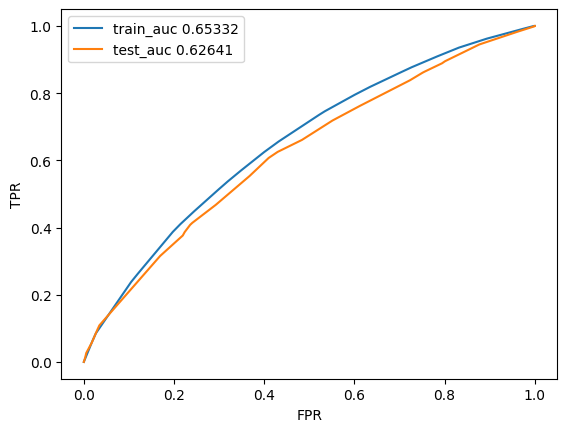

In [ ]:
plt.plot(train_fpr,train_tpr,label = "train_auc "+str(round(train_auc,5)))
plt.plot(test_fpr,test_tpr,label = "test_auc "+str(round(test_auc,5)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [ ]:
test_actual_pred = pd.DataFrame({'actual':np.array(y_test),'pred':y_test_pred_value})
true_neg_count = test_actual_pred[(test_actual_pred['actual'] == 0) & (test_actual_pred['pred'] == 0)].shape[0]
true_pos_count = test_actual_pred[(test_actual_pred['actual'] == 1) & (test_actual_pred['pred'] == 1)].shape[0]
false_pos_count = test_actual_pred[(test_actual_pred['actual'] == 0) & (test_actual_pred['pred'] == 1)].shape[0]
false_neg_count = test_actual_pred[(test_actual_pred['actual'] == 1) & (test_actual_pred['pred'] == 0)].shape[0]

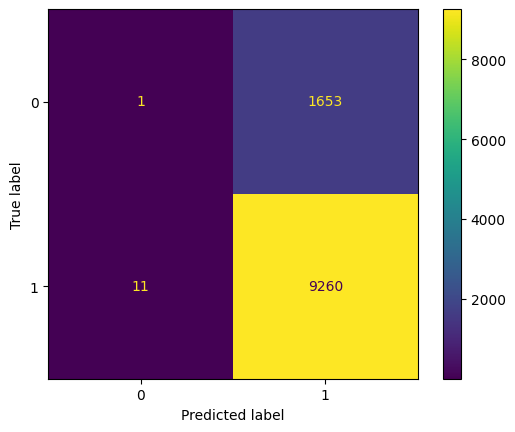

In [ ]:
cm = np.array([
    [true_neg_count,false_pos_count],
    [false_neg_count,true_pos_count]
    ])


disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

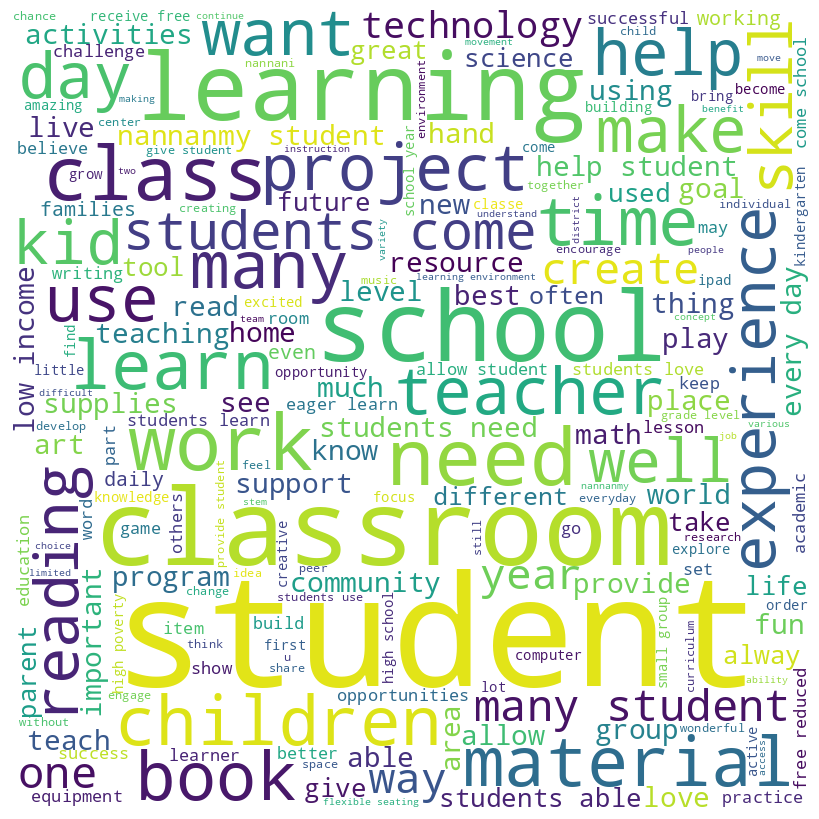

In [ ]:
essay_df = pd.DataFrame(X_test['essay'])
y_test_df = pd.DataFrame(y_test)
essay_test_actual = pd.merge(essay_df,y_test_df,left_index = True,right_index = True)

y_test_pred_df = pd.DataFrame({'pred_value':y_test_pred_value})
essay_test_actual['index'] = list(range(essay_test_actual.shape[0]))
essay_actual_pred_df = pd.merge(essay_test_actual,y_test_pred_df,left_on = 'index',right_index=True)
essay_actual_pred_df.drop('index',axis = 1,inplace = True)
false_pos_df = essay_actual_pred_df[(essay_actual_pred_df['project_is_approved'] == 0) & (essay_actual_pred_df['pred_value'] == 1)]



stopwords = set(STOPWORDS)
final_essay_data = ''
for str_data in false_pos_df['essay'].values:
  str_data = str(str_data)
  str_data = str_data.lower()
  final_essay_data = final_essay_data + str_data

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(final_essay_data)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()



In [ ]:
import threading
class TFIDF_W2V(threading.Thread):
  def __init__(self,start,end,tfidf_w2v_vec,**kwargs):
    super(TFIDF_W2V,self).__init__(**kwargs)
    self.start_index = start
    self.end_index = end
    self.tfidf_w2v_vec = tfidf_w2v_vec
    self.daemon = True
    self.start()

  def tfidf_computation(self):
    print("running for range ",self.start_index,self.end_index)
    for essay_index in np.arange(self.start_index,self.end_index):

      essay_str = X_train['essay'].values[essay_index]
      essay_str_list = essay_str.split(" ")

      final_vect = np.zeros(W2V_dim).reshape(1,W2V_dim)
      total_tfidf = 0

      for essay_word in essay_str_list:
        if essay_word in model.keys() and essay_word in tfidf.vocabulary_.keys():
          essay_word_w2v = model[essay_word]
          essay_word_tfidf = X_train_essay[essay_index].toarray()[0][word_index_dict[essay_word]]
          # print("the tfidf value is ",essay_word_tfidf)
          # print("the w2v value is ",essay_word_w2v)
          tfidf_w2v = essay_word_tfidf * essay_word_w2v #w2v * tfidf
          # print("TFIDF w2V..")
          # print(tfidf_w2v)
          tfidf_w2v = tfidf_w2v.reshape(1,W2V_dim)

          final_vect  = final_vect + tfidf_w2v
          # print("the final vec ts is")
          # print(final_vect)
          total_tfidf += essay_word_tfidf
        else:
          continue


      try:
        final_vect = final_vect/total_tfidf
        self.tfidf_w2v_vec = np.concatenate((self.tfidf_w2v_vec,final_vect),axis = 0)


      except Exception as ze:
        print(ze)
        print("Exception word is ",essay_word)



  def run(self):
    self.tfidf_computation()
